In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [3]:
data_train = pd.read_csv("data/train_data_fe.csv")
data_test = pd.read_csv("data/test_data_fe.csv")
train = data_train.copy()
test = data_train.copy()

In [4]:
from sklearn.linear_model import Lasso,Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def check_models(x,y,tx,ty):
    models = [Lasso(),Ridge(), LinearRegression()]
    acc = {}
    for model in models:
        #print(model)
        model.fit(x,y)
        y_pred = model.predict(tx)
#         print(f"training accuracy: {model.score(x,y)}")
#         print(f"testing accuracy: {model.score(tx,ty)}")
#         print(f"mae : {mean_absolute_error(ty,y_pred)}")
#         print(f"mse : {mean_squared_error(ty,y_pred)}")
#         print(f"r2 : {r2_score(ty,y_pred)}")
        acc[model] = r2_score(ty,y_pred)


                        
        #print("*"*20)
    best = (max(acc, key=acc.get))
    print(f"the best model is {best} with the score of {round(acc[best],4)}")

        

In [5]:
X = train.drop("SalePrice",1)
y = train["SalePrice"]

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.25,random_state=26)

In [7]:
check_models(train_x,train_y,test_x,test_y)

the best model is LinearRegression() with the score of 0.8651


In [8]:
model = Ridge()
model.fit(train_x,train_y)

Ridge()

In [9]:
pred = model.predict(test_x) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

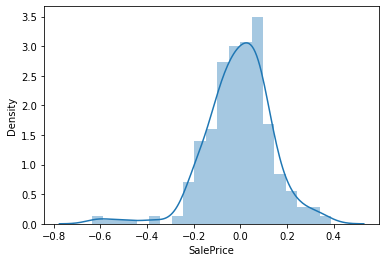

In [10]:
sns.distplot(test_y - pred)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

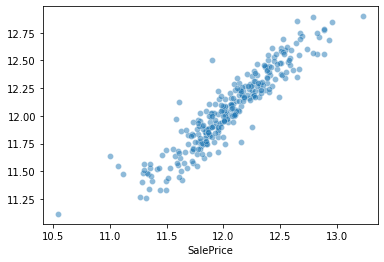

In [11]:
sns.scatterplot(test_y,pred, alpha=0.5)

In [12]:
from sklearn.model_selection import RandomizedSearchCV

In [13]:
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

alpha = [1,100,200,500,1000]

params = {
    "solver": solver,
    "alpha":alpha,
}


new_model = RandomizedSearchCV(Ridge(),param_distributions=params)


In [14]:
new_model.fit(train_x,train_y)

RandomizedSearchCV(estimator=Ridge(),
                   param_distributions={'alpha': [1, 100, 200, 500, 1000],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']})

In [15]:
best_model = new_model.best_estimator_
best_model.fit(train_x,train_y)

Ridge(alpha=1, solver='svd')

In [35]:
predy = best_model.predict(test_x)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

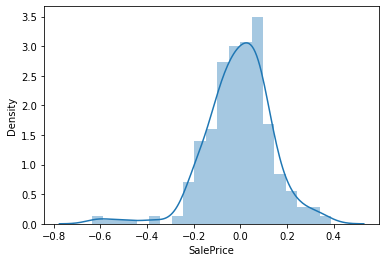

In [36]:
sns.distplot(test_y - predy)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

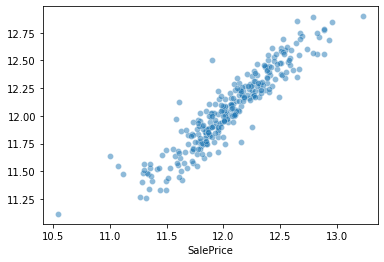

In [37]:
sns.scatterplot(test_y,predy, alpha=0.5)

In [38]:
import pickle


In [39]:
file = open('model_house.pkl','wb')

In [40]:
pickle.dump(best_model,file)

In [41]:
file = open('model_house.pkl','rb')

In [42]:
ridge = pickle.load(file)

In [43]:
print(f"training accuracy: {ridge.score(train_x,train_y)}")
print(f"testing accuracy: {ridge.score(test_x,test_y)}")
print(f"mae : {mean_absolute_error(test_y,predy)}")
print(f"mse : {mean_squared_error(test_y,predy)}")
print(f"r2 : {r2_score(test_y,predy)}")


training accuracy: 0.8900293627678487
testing accuracy: 0.8634617248145813
mae : 0.10564331120047944
mse : 0.02064630451041679
r2 : 0.8634617248145813


In [44]:
np.exp(train["SalePrice"])

0       423000.0
1       160000.0
2       112000.0
3       131500.0
4       297000.0
          ...   
1163    119500.0
1164    174000.0
1165    210000.0
1166    228500.0
1167     93000.0
Name: SalePrice, Length: 1168, dtype: float64

In [51]:
train_new = pd.DataFrame()

In [52]:
train_new["True"] = np.exp(test_y)

In [53]:
train_new["pred"] = np.exp(predy)

In [55]:
train_new['diff'] = train_new["True"] - train_new["pred"]

In [56]:
train_new

,True,pred,diff
794,156000.0,166259.820708,-10259.820708
568,224500.0,206301.548153,18198.451847
656,147000.0,268378.606525,-121378.606525
1107,130000.0,156417.547455,-26417.547455
1086,240000.0,218019.034724,21980.965276
...,...,...,...
1045,196000.0,192900.103532,3099.896468
121,151500.0,139061.435113,12438.564887
156,250000.0,299746.632397,-49746.632397
474,320000.0,324113.451555,-4113.451555
